# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
#Regression Libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score,mean_squared_error,classification_report
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
warnings.filterwarnings("ignore")

In [4]:
#to center align the graphs
from IPython.core.display import HTML
HTML("""<style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>""")

In [5]:
Model_Data = pd.DataFrame(columns = ["Model","Train_R2","Test_R2","Test RMSE","Alpha Value"])

# Data Import

In [6]:
house = pd.read_csv("train.csv")

In [7]:
house.shape

(1460, 81)

In [8]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
house.shape[1]

81

In [11]:
temp1 = 100*(house.isnull().sum()/house.shape[0])
pd.DataFrame(temp1, columns = ["Missing Value"]).sort_values(by = "Missing Value",ascending = False).head(20)

,Missing Value
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageCond,5.547945
GarageType,5.547945
GarageFinish,5.547945


# Data Transformation

## Missing Value Treatment

### Garage Columns

The NA In Garage Columns stands for No Garage - Converting that to better attribute NG which stands for No Garage

In [12]:
house["GarageType"] = house["GarageType"].fillna("NG")
house["GarageFinish"] = house["GarageFinish"].fillna("NG")
house["GarageQual"] = house["GarageQual"].fillna("NG")
house["GarageCond"] = house["GarageCond"].fillna("NG")

### Fire Place Column

The NA In FirePlaceQu Columns stands for No FirePlace - Converting that to better attribute NF which stands for No FirePlace

In [13]:
house["FireplaceQu"] = house["FireplaceQu"].fillna("NF")

### Basement Column

The NA In Basement Columns stands for No Basement - Converting that to better attribute NB which stands for No Basement

In [14]:
house["BsmtQual"] = house["BsmtQual"].fillna("NB")
house["BsmtCond"] = house["BsmtCond"].fillna("NB")
house["BsmtExposure"] = house["BsmtExposure"].fillna("NB")
house["BsmtFinType1"] = house["BsmtFinType1"].fillna("NB")
house["BsmtFinType2"] = house["BsmtFinType2"].fillna("NB")

### Alley Column

The NA In Alley Columns stands for No Alley Access - Converting that to better attribute No which stands for No Alley Access

In [15]:
house["Alley"] = house["Alley"].fillna("No")

### Masonary Veneer Type

To impute the missing values for Masonary Veneer type - The mode of type of Masonary Veneer Type based on Neighborhood 
was used. For almost all region except for NridgHt - the mode was None. Since the Mode is None which means that Masonary Veneer Area value would be fixed to 0.

In [16]:
temp = house[house["Neighborhood"] == "Gilbert"]
print(temp["MasVnrType"].mode())
print(temp["MasVnrArea"].median())

0    None
dtype: object
0.0


Below table was a result of running the above code based on the locations

| Neighborhood | MasVnrType Mode | MasVnrArea Value |
| --- | --- | --- |
| Gilbert | None | 0 |
| Crawfor | None | 0 |
| Somerst | None | 0 |
| SawyerW | None | 0 |
| NridgHt | Stone | 289 |
| CollgCr | None | 0 |

In [17]:
house.loc[((house["MasVnrType"].isnull()) & (house["Neighborhood"] == "Gilbert")), "MasVnrType"] = "None"
house.loc[((house["MasVnrType"].isnull()) & (house["Neighborhood"] == "Crawfor")), "MasVnrType"] = "None"
house.loc[((house["MasVnrType"].isnull()) & (house["Neighborhood"] == "Somerst")), "MasVnrType"] = "None"
house.loc[((house["MasVnrType"].isnull()) & (house["Neighborhood"] == "SawyerW")), "MasVnrType"] = "None"
house.loc[((house["MasVnrType"].isnull()) & (house["Neighborhood"] == "CollgCr")), "MasVnrType"] = "None"
house.loc[((house["MasVnrType"].isnull()) & (house["Neighborhood"] == "NridgHt")), "MasVnrType"] = "Stone"

In [18]:
house.loc[((house["MasVnrArea"].isnull()) & (house["Neighborhood"] == "Gilbert")), "MasVnrArea"] = 0
house.loc[((house["MasVnrArea"].isnull()) & (house["Neighborhood"] == "Crawfor")), "MasVnrArea"] = 0
house.loc[((house["MasVnrArea"].isnull()) & (house["Neighborhood"] == "Somerst")), "MasVnrArea"] = 0
house.loc[((house["MasVnrArea"].isnull()) & (house["Neighborhood"] == "SawyerW")), "MasVnrArea"] = 0
house.loc[((house["MasVnrArea"].isnull()) & (house["Neighborhood"] == "CollgCr")), "MasVnrArea"] = 0
house.loc[((house["MasVnrArea"].isnull()) & (house["Neighborhood"] == "NridgHt")), "MasVnrArea"] = 289

### Electrical

Similary for Electrical there was one row with missing value - Above approach has been followed here.

In [19]:
temp = house[house["Neighborhood"] == "Timber"]
print(temp["Electrical"].mode())


0    SBrkr
dtype: object


In [20]:
house.loc[((house["Electrical"].isnull()) &(house["Neighborhood"]=="Timber")),"Electrical"] ="SBrkr"

### Lot Frontage

There are multiple possibility for NA values here - 

1. For a plot which is inside -  NA in this context would mean that the plot wouldn't have any linear feet of street connected to property - It would be logical to assign all NA as 0 indicating that it doesnt have any street area connected to it

In [21]:
house.loc[((house["LotFrontage"].isnull()) &(house["LotConfig"]=="Inside")),"LotFrontage"] = 0

2. For a plot which is either CulDSac, FR2, Corner - the NA Value can be better replaced with the Median values of each category

In [22]:
culdsac_lf = house[house["LotConfig"]=="CulDSac"].LotFrontage.median()
fr2_lf = house[house["LotConfig"]=="FR2"].LotFrontage.median()
fr3_lf = house[house["LotConfig"]=="FR3"].LotFrontage.median()
corner_lf = house[house["LotConfig"]=="Corner"].LotFrontage.median()

In [23]:
house.loc[((house["LotFrontage"].isnull()) &(house["LotConfig"]=="Corner")),"LotFrontage"] = corner_lf
house.loc[((house["LotFrontage"].isnull()) &(house["LotConfig"]=="FR2")),"LotFrontage"] = fr2_lf
house.loc[((house["LotFrontage"].isnull()) &(house["LotConfig"]=="FR3")),"LotFrontage"] = fr3_lf
house.loc[((house["LotFrontage"].isnull()) &(house["LotConfig"]=="CulDSac")),"LotFrontage"] = culdsac_lf

### Year Treatment

Assuming that data collected is for max of YrSold (i.e 2010) - it would be better for analysis if we convert all the years which talk about age to numbers.

In [24]:
house["Age"] = max(house["YrSold"])-house["YearBuilt"]
house["Age_revamp"] = max(house["YrSold"]) - house["YearRemodAdd"]
house["Age_garage"] = max(house["YrSold"]) - house["GarageYrBlt"]

### Garage Age

Since there are significant missing values in Garage Age - imputing the NA Value as 0

In [25]:
house["Age_garage"] = house["Age_garage"].fillna(0)

### PoolQC

In [26]:
house["PoolQC"] = house["PoolQC"].fillna("NP")

### Fence

In [27]:
house["Fence"] = house["Fence"].fillna("NFen")

## Binary Columns Label Encoding

All Binary Categorical columns for the ease is converted to 0/1 for ease of calculation

In [28]:
#Street Column
house[["Street"]] = house[["Street"]].apply(lambda x:x.map({"Grvl":0,"Pave":1}))
#Utilities Column
house[["Utilities"]] = house[["Utilities"]].apply(lambda x:x.map({"AllPub":0,"NoSeWa":1}))
#Central Air Column
house[["CentralAir"]] = house[["CentralAir"]].apply(lambda x:x.map({"N":0,"Y":1}))

## Ordinal Columns Label Encoding

The propsed path forward is to Label encode all the Ordinal Categorical Variable - Dummy encoding is applicable for nominal categorical and additionally it will reduce the number of dummy variables that will be created (keeps the model simple)

<b> NOTE: - A manual process was followed instead of using LabelEncoder so that the priority could be assigned right based on business domain knowledge</b>

In [29]:
#BldgType
house[["BldgType"]] = house[["BldgType"]].apply(lambda x:x.map({"1Fam":0,"2FmCon":1,"Duplx":2,"TwnhsE":3,"TwnhsI":4}))
#LandSlope
house[["LandSlope"]] = house[["LandSlope"]].apply(lambda x:x.map({"Gtl":0,"Mod":1,"Sev":2}))
#LotConfig
house[["LotConfig"]] = house[["LotConfig"]].apply(lambda x:x.map({"Inside":0,"Corner":1,"CulDSac":2,"FR2":3,"FR3":4}))
#LotShape
house[["LotShape"]] = house[["LotShape"]].apply(lambda x:x.map({"Reg":0,"IR1":1,"IR2":2,"IR3":3}))
#ExterQual
house[["ExterQual"]] = house[["ExterQual"]].apply(lambda x:x.map({"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4}))
#ExterCond
house[["ExterCond"]] = house[["ExterCond"]].apply(lambda x:x.map({"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4}))
#BsmtQual
house[["BsmtQual"]] = house[["BsmtQual"]].apply(lambda x:x.map({"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5,"NB":0}))
#BsmtCond
house[["BsmtCond"]] = house[["BsmtCond"]].apply(lambda x:x.map({"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5,"NB":0}))
#BsmtExposure
house[["BsmtExposure"]] = house[["BsmtExposure"]].apply(lambda x:x.map({"No":1,"Mn":2,"Av":3,"Gd":4,"NB":0}))
#BsmtFinType1
house[["BsmtFinType1"]] = house[["BsmtFinType1"]].apply(lambda x:x.map({"NB":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6}))
#BsmtFinType2
house[["BsmtFinType2"]] = house[["BsmtFinType2"]].apply(lambda x:x.map({"NB":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6}))
#HeatingQC
house[["HeatingQC"]] = house[["HeatingQC"]].apply(lambda x:x.map({"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4}))
#KitchenQual
house[["KitchenQual"]] = house[["KitchenQual"]].apply(lambda x:x.map({"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4}))
#Functional
house[["Functional"]] = house[["Functional"]].apply(lambda x:x.map({"Sal":0,"Sev":1,"Maj2":2,"Maj1":3,"Mod":4,"Min2":5,"Min1":6,"Typ":7}))
#FireplaceQu
house[["FireplaceQu"]] = house[["FireplaceQu"]].apply(lambda x:x.map({"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5,"NF":0}))
#GarageType
house[["GarageType"]] = house[["GarageType"]].apply(lambda x:x.map({"NG":0,"Detchd":1,"CarPort":2,"BuiltIn":3,"Basment":4,"Attchd":5,"2Types":6}))
#GarageQual
house[["GarageQual"]] = house[["GarageQual"]].apply(lambda x:x.map({"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5,"NG":0}))
#GarageCond
house[["GarageCond"]] = house[["GarageCond"]].apply(lambda x:x.map({"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5,"NG":0}))
#PoolQC
house[["PoolQC"]] = house[["PoolQC"]].apply(lambda x:x.map({"Fa":1,"TA":2,"Gd":3,"Ex":4,"NP":0}))
#Fence
house[["Fence"]] = house[["Fence"]].apply(lambda x:x.map({"NFen":0,"MnWw":1,"GdWo":2,"MnPrv":3,"GdPrv":4}))

# Variables with Mode value greater than 80%

In [30]:
df = pd.DataFrame({'Columns': house.columns,"Attribute":[house[x].mode()[0] for x in house],
                   'Val':[house[x].isin(house[x].mode()).sum()/house.shape[0]*100 for x in house]})

In [31]:
df = df[(df["Val"])>=80]

In [32]:
df

,Columns,Attribute,Val
0,Id,1,100.000000
5,Street,1,99.589041
6,Alley,No,93.767123
8,LandContour,Lvl,89.794521
9,Utilities,0,99.931507
11,LandSlope,0,94.657534
13,Condition1,Norm,86.301370
14,Condition2,Norm,98.972603
15,BldgType,0.0,83.561644
22,RoofMatl,CompShg,98.219178


<b> IMPORTANT </b> : It is proposed to drop columns which has one value appearing more than 80% of the time since this could probably create skewed effect on the model and add to its complexity.

## Drop Columns

In [33]:
#the below columns have already been taken in to account from above Year Transformation
house.drop(["YearBuilt","YearRemodAdd","GarageYrBlt"],axis = 1, inplace = True)

In [34]:
#the below columns have single value appearing more than 80% of the time
house.drop(list(df["Columns"]),axis = 1, inplace = True)

In [35]:
#the below columns have no relevance to the modelling
house.drop(["MiscFeature"],axis = 1, inplace = True)

# Exploratory Data Analysis

## Numerical Variables - Heat Map

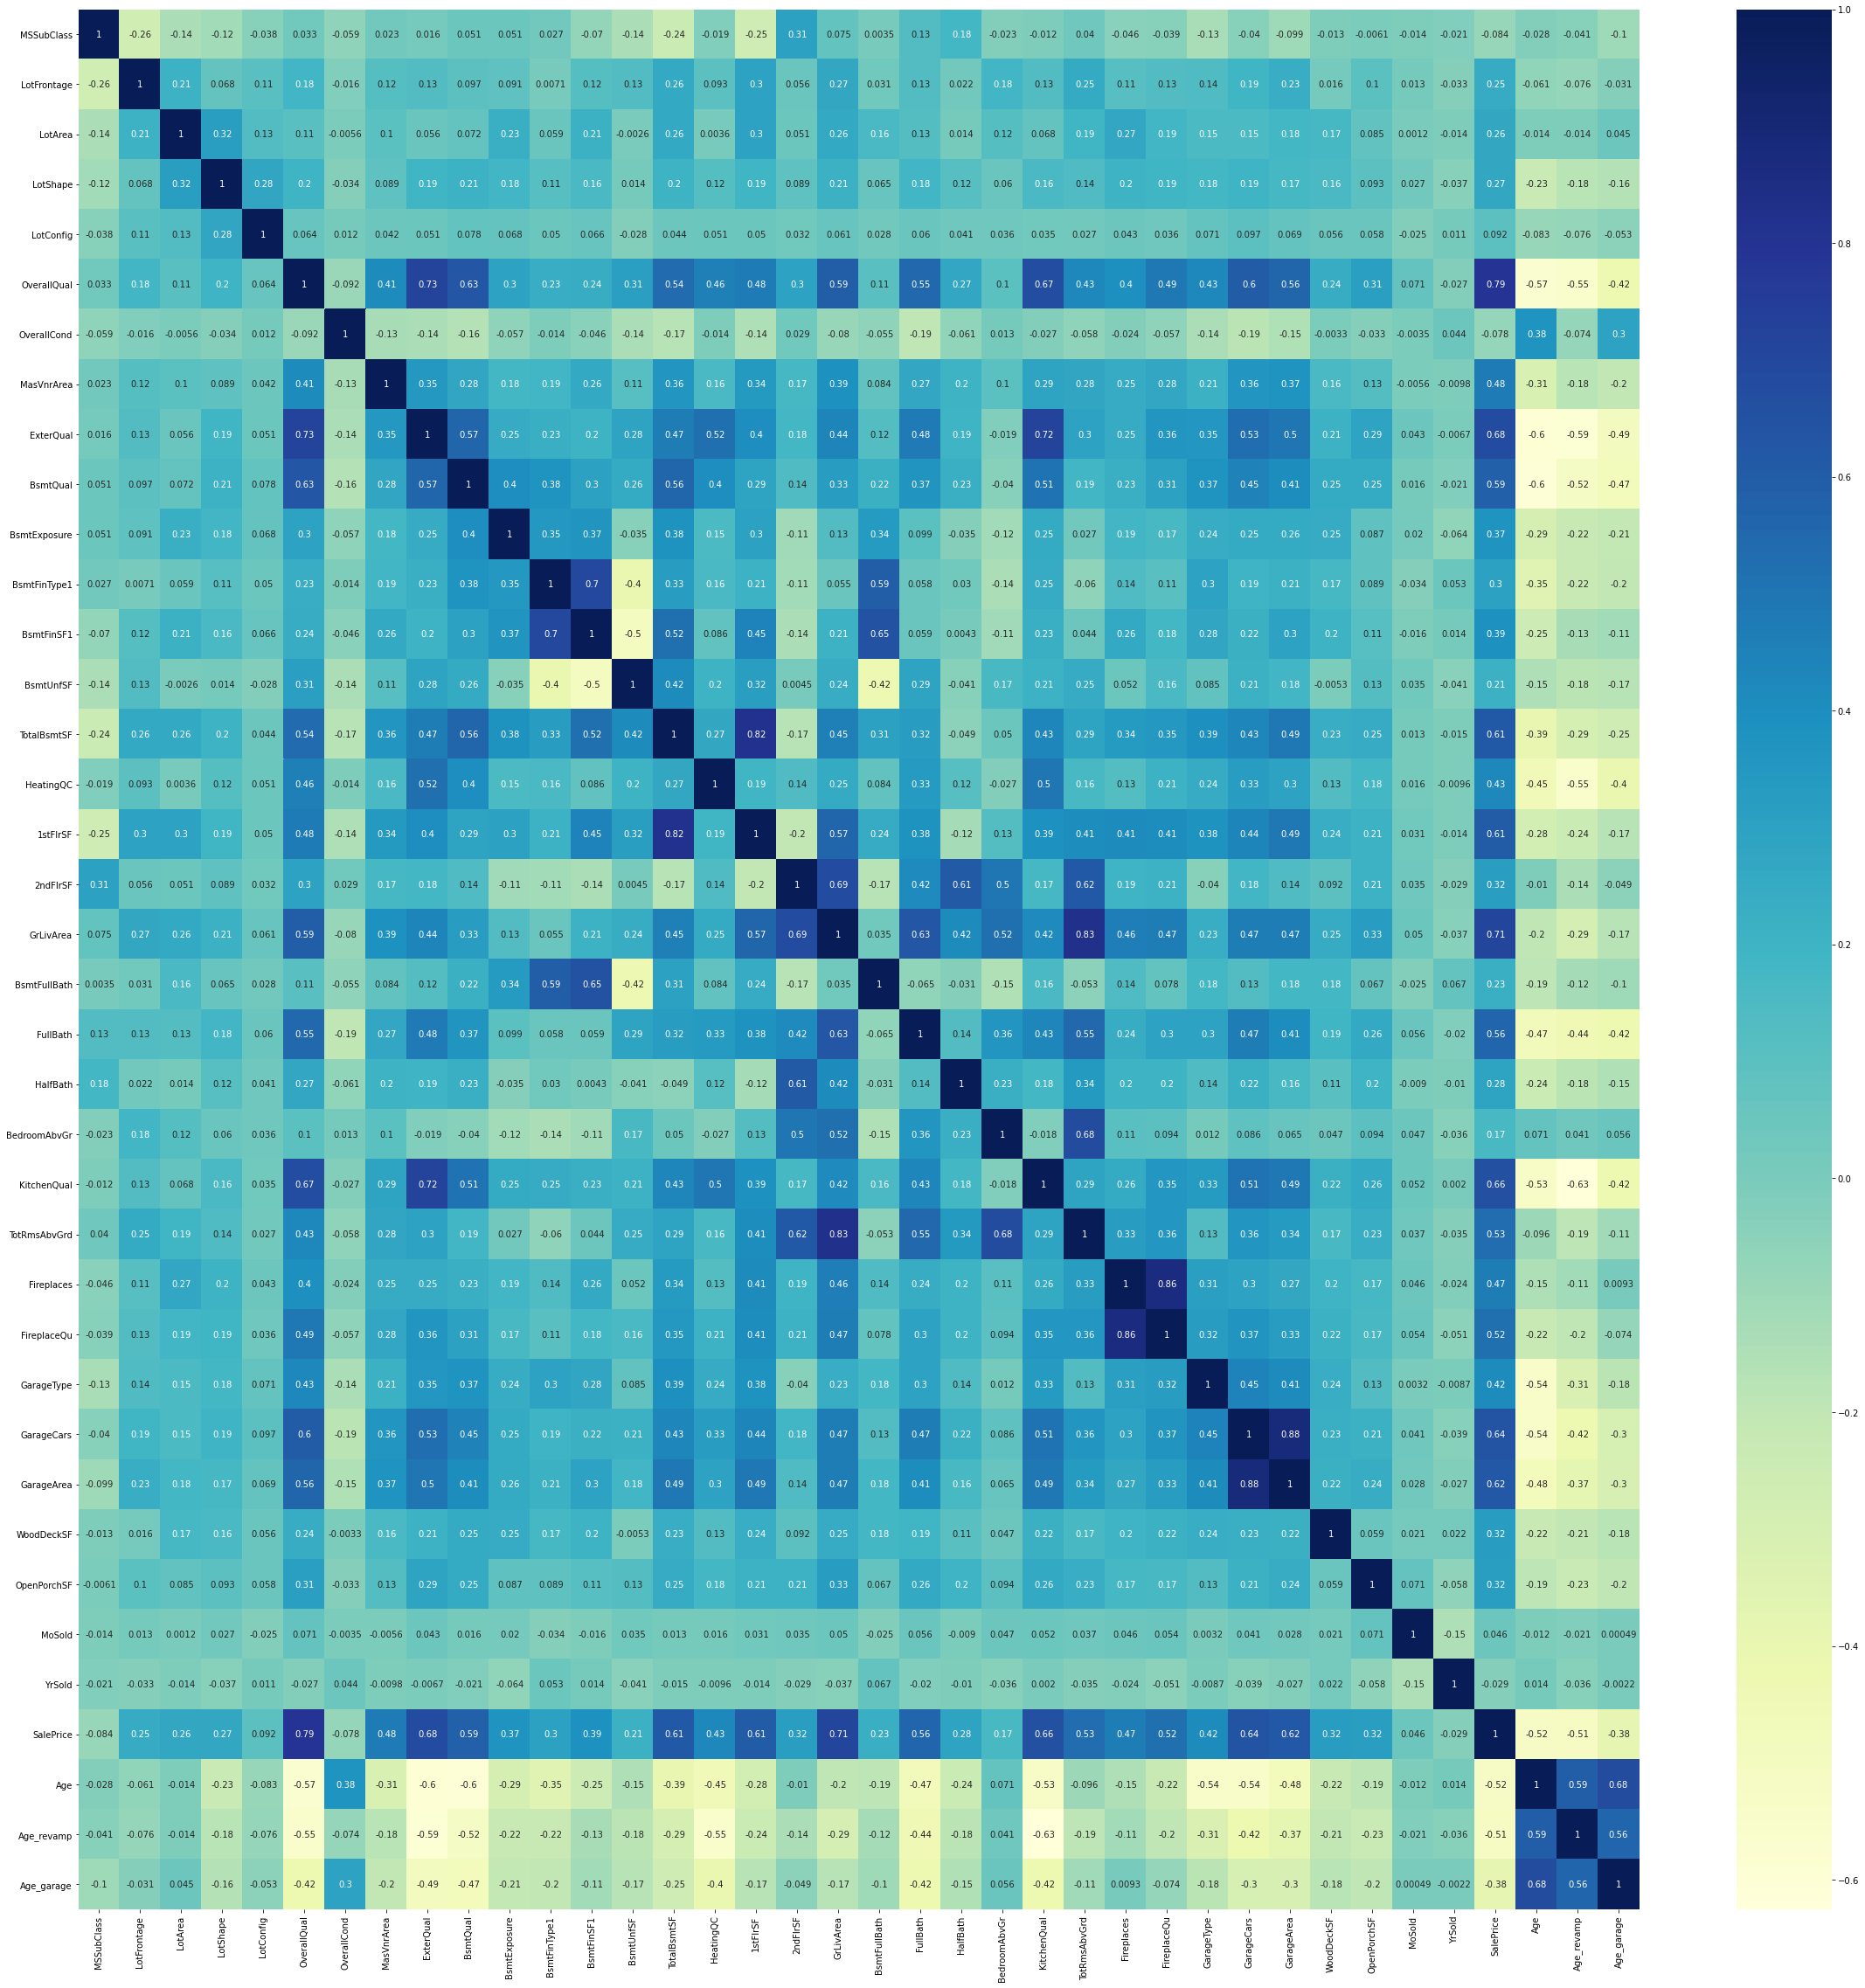

In [36]:
plt.figure(figsize = (40,40))
sns.heatmap(house.corr(), annot = True, cmap= "YlGnBu")
plt.show()
# Double click to get a better clarity picture

<blockquote>Heat Map Conclusions</blockquote>
            
    1. Age of the the property seems to have a negative influence on the price.
    2. Area variables showed significant correlation to the target varialbe SalePrice.   
    3.Certain Counts such as Number of Bathrooms,garage cars also had considerable influence on the target variable.
    4. IMPORTANT : - Finally, the proposal is not to move forward with features that have correlation less than 0.3. Below step indicates this action
    

#### Drop Columns with Correlation less than 0.2

In [37]:
#creating a list of columns to be dropped that have a correlation value less than 0.2 (proposed threshold)
temp = abs(house.corr()["SalePrice"])>0.2
print(temp.value_counts())
corr_drop_col = temp[temp==False]
print(list(corr_drop_col.index))

True     32
False     6
Name: SalePrice, dtype: int64
['MSSubClass', 'LotConfig', 'OverallCond', 'BedroomAbvGr', 'MoSold', 'YrSold']


In [38]:
house.drop(list(corr_drop_col.index),axis = 1, inplace = True)

## Univariate Analysis

### Overall Quality

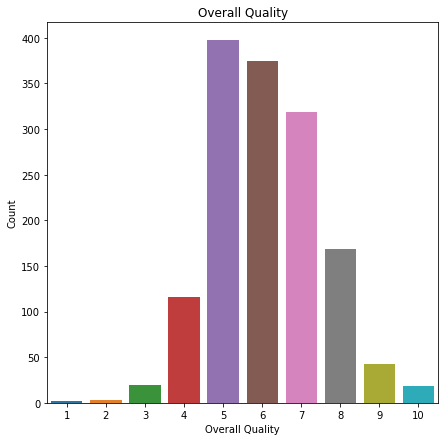

In [39]:
plt.figure(figsize =(7,7))
sns.countplot(house["OverallQual"])
plt.xlabel("Overall Quality")
plt.ylabel("Count")
plt.title("Overall Quality")
plt.show()

<blockquote> 
    
    1. Material and Finish: The conclusion that we can draw is that majority of the house in the dataset has average(5), above average(6), and Good(7) quality house.
   
</blockquote>

### Neighborhood

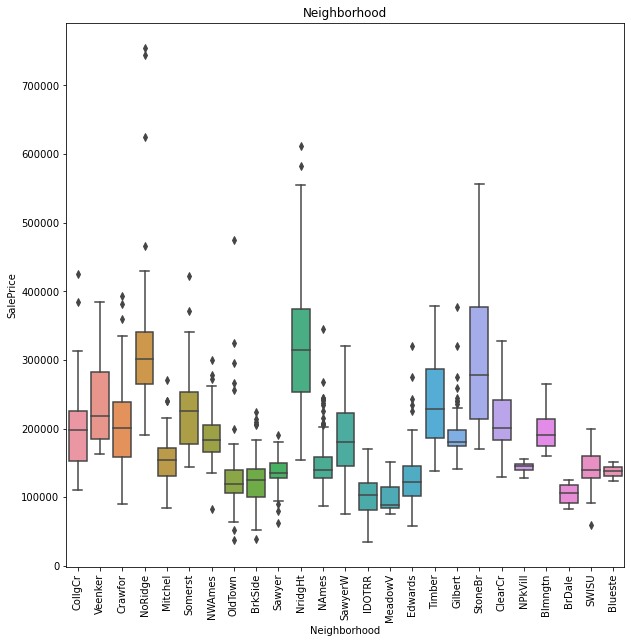

In [40]:
plt.figure(figsize = (10,10))
sns.boxplot(x = house.Neighborhood, y = house.SalePrice)
plt.xticks(rotation = 90 )
plt.title("Neighborhood")
plt.show()

<blockquote> The NridgHt Neighborhood, ClearCr, NoRidge seems to have houses with median at the higher price end. NoRidge has sales that have the top three sales in the dataset.

### Age

<Figure size 720x720 with 0 Axes>

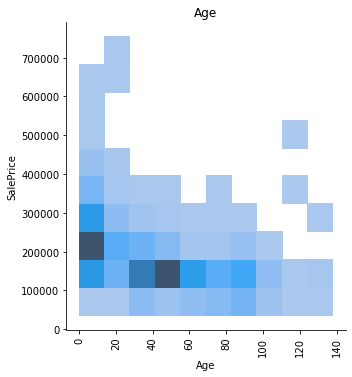

In [41]:
plt.figure(figsize = (10,10))
sns.displot(x = house.Age, y = house.SalePrice, bins = 10)
plt.xticks(rotation = 90 )
plt.title("Age")
plt.show()

<blockquote> Majority of the houses were less than 20 years old. They typically sell off in the range of 200k Dollars to 250k Dollars. Additionally there is also a market for houses that are 40 - 60 years old and they sell off in the range of 100k Dollars to 200k Dollars

## Bivariate Analysis for Target Columns

### Area Variables Pairplot

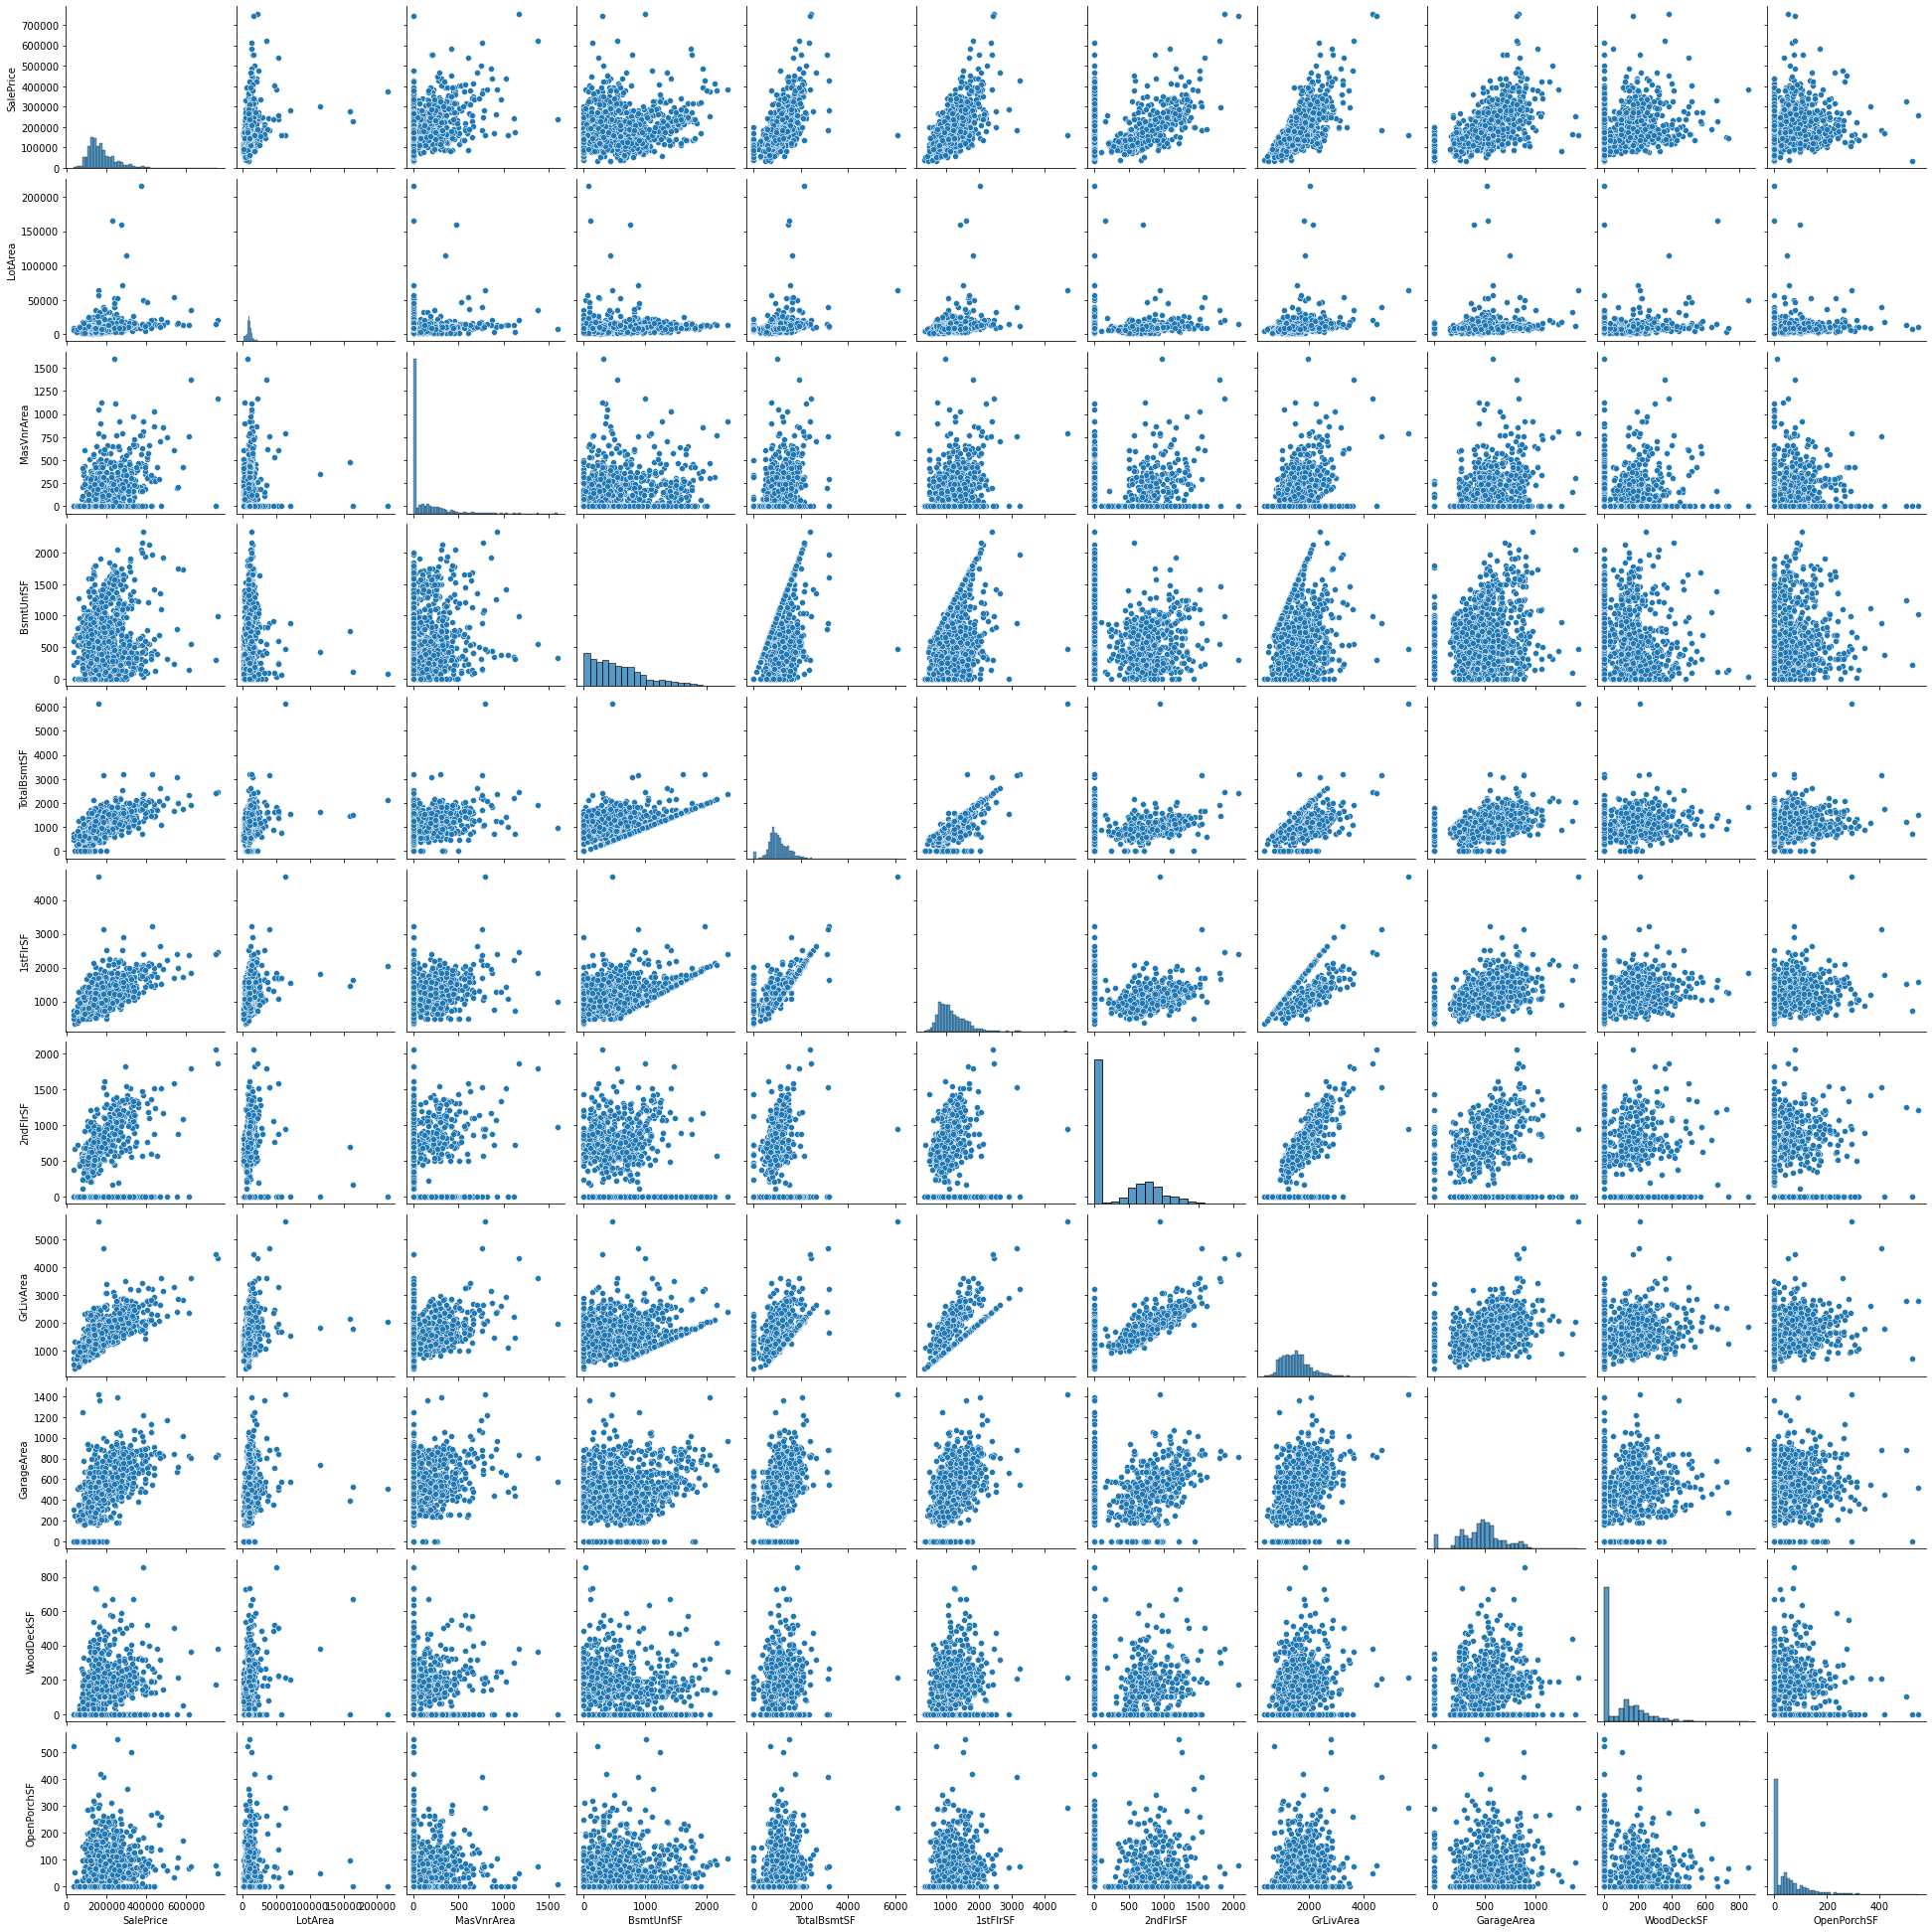

In [42]:
num_area_vars = ["SalePrice","LotArea","MasVnrArea","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF"]
sns.pairplot(data = house[num_area_vars])
plt.show()

<blockquote>
   
    1. From the first column we can conclude that area variables that significantly influence (and has linear relationship - hence regression based approach) the SalePrice are GrLivArea,1stFlrSF, GarageArea, 2ndFlrSF, TotalBsmtSF,MasVnrArea.
   
    2. Additionally there is presence of multicollinearity between some of these variables - For example GrLivArea v/s 1stFlrSF is highly correlated (mostly a straight line scatter plot)
</blockquote> 

### Count Variables Pairplot

<Figure size 1440x1440 with 0 Axes>

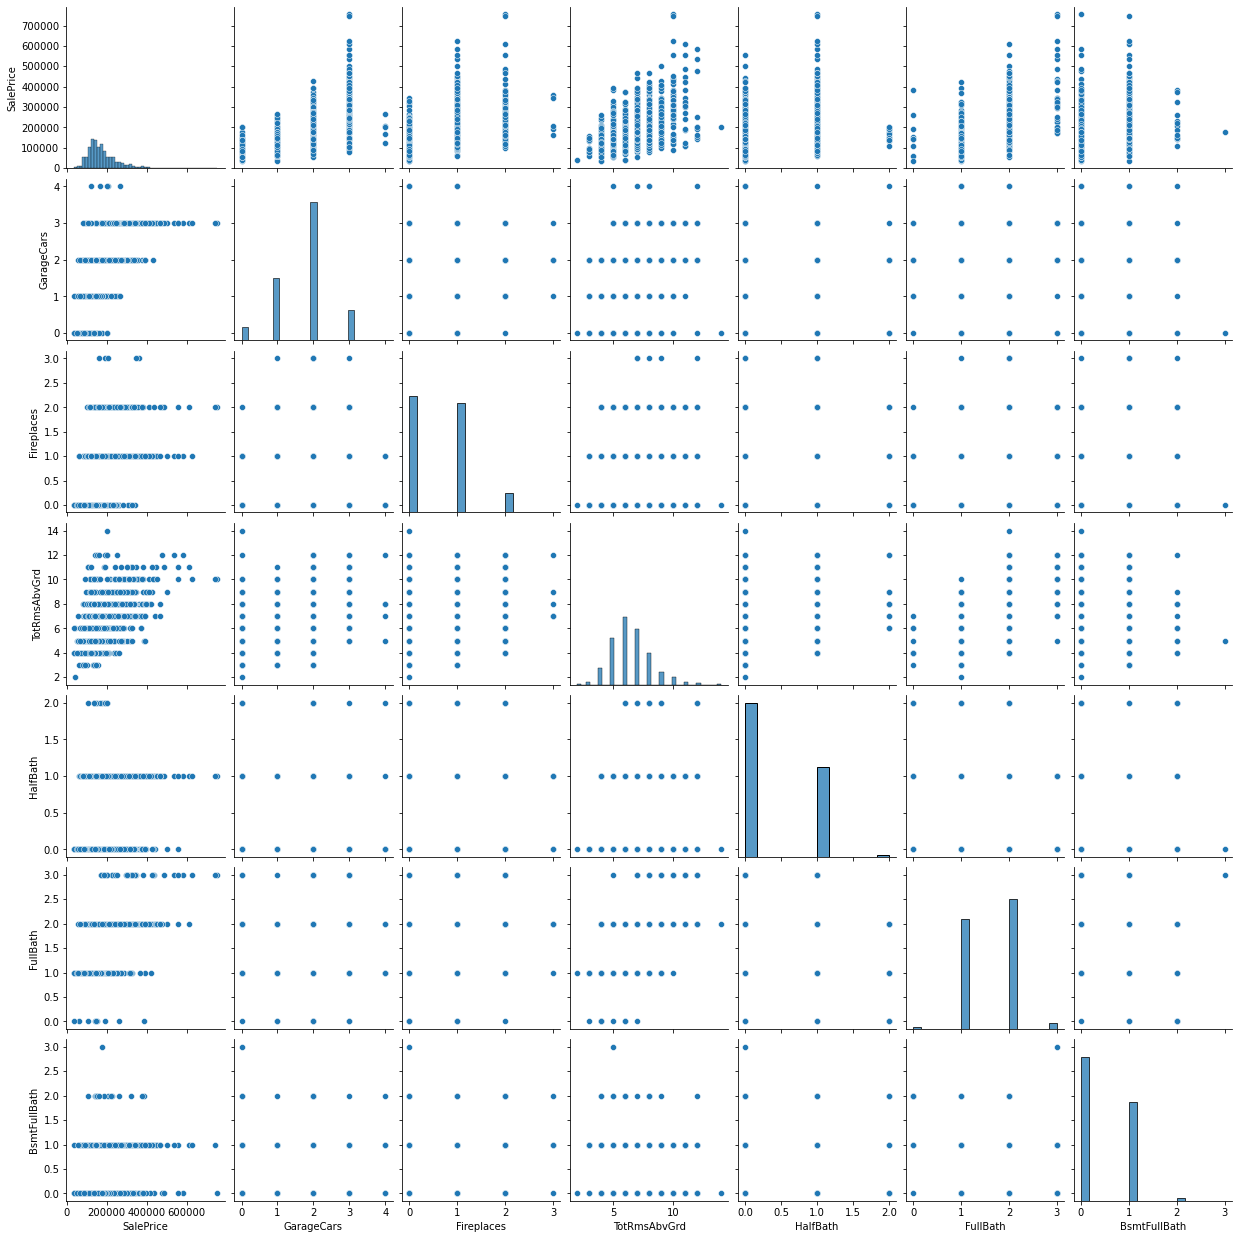

In [43]:
num_count_vars = ["SalePrice","GarageCars","Fireplaces","TotRmsAbvGrd","HalfBath","FullBath","BsmtFullBath"]
plt.figure(figsize = (20,20))
sns.pairplot(data = house[num_count_vars])
plt.show()

<blockquote>
   
    1. From the first column we can conclude that count variables that significantly influence the SalePrice are TotalRmsAbvGrd,GarageCars,FullBath
   
</blockquote> 

# Dummy Encoding

In [44]:
nom_categorical_vars = house.select_dtypes(include = ["object"])
dummy_df = pd.get_dummies(nom_categorical_vars, drop_first = True)
house = pd.concat([house,dummy_df],axis = 1)
house.drop(nom_categorical_vars, axis = 1, inplace = True)

In [45]:
#Splitting into X and y
X = house.drop("SalePrice",axis = 1)
y = np.log10(house["SalePrice"])

<b> Note: </b>The choice of using log for SalesPrice is to get better model results and evaluation metrics - The former trials were run on SalesPrice without any transformation - However resulted in lesser accurate models

### Test_Train_Split

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 51, shuffle = True)
(X_train.shape,X_test.shape)

((1021, 111), (439, 111))

### Scaling

In [47]:
column_list = X_train.columns

In [48]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = column_list)
X_test = pd.DataFrame(scaler.transform(X_test),columns = column_list)

## ML Model - Multiple Linear Regression

### Recursive Feature Elimination

It is proposed to take the top 20 significant variables

In [49]:
mlr_lm = LinearRegression()
mlr_lm.fit(X_train,y_train)
rfe = RFE(mlr_lm, 20)
rfe = rfe.fit(X_train,y_train)

In [50]:
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['LotArea', 'OverallQual', 'BsmtQual', 'BsmtFinType1', 'GrLivArea',
       'KitchenQual', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'Age_revamp',
       'MSZoning_RL', 'Neighborhood_BrDale', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'RoofStyle_Shed', 'Exterior1st_BrkFace', 'Exterior2nd_Stone',
       'Exterior2nd_Stucco'],
      dtype='object')


#### Model 1

In [51]:
X_train_rfe = X_train[rfe_cols]
X_train_rfe_const = sm.add_constant(X_train_rfe)
y_train_rfe = np.array(y_train).reshape(-1,1)
mlr_lm_rfe = sm.OLS(y_train_rfe,X_train_rfe_const).fit()
mlr_lm_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     365.5
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:50:14   Log-Likelihood:                 1433.7
No. Observations:                1021   AIC:                            -2825.
Df Residuals:                    1000   BIC:                            -2722.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.7010      0.013    375.496      0.000       4.676       4.726
LotArea                  0.2225      0.041      5.363      0.000       0.141       0.304
OverallQual              0.3066      0.023     13.266      0.000       0.261       0.352
BsmtQual                 0.0863      0.015      5.679      0.000       0.057       0.116
BsmtFinType1             0.0499      0.006      8.647      0.000       0.039       0.061
GrLivArea                0.5201      0.026     19.988      0.000       0.469       0.571
KitchenQual              0.0720      0.013      5.588      0.000       0.047       0.097
GarageCars               0.1704      0.013     12.643      0.000       0.144       0.197
WoodDeckSF               0.0487      0.012      4.018      0.000       0.025       0.073
OpenPorchSF              0.0572      0.017      3.320      0.001       0.023       0.091
Age_revamp              -0.0470      0.008     -6.203      0.000      -0.062      -0.032
MSZoning_RL              0.0365      0.005      7.081      0.000       0.026       0.047
Neighborhood_BrDale     -0.0543      0.020     -2.751      0.006      -0.093      -0.016
Neighborhood_Crawfor     0.0731      0.012      6.351      0.000       0.051       0.096
Neighborhood_MeadowV    -0.0541      0.020     -2.706      0.007      -0.093      -0.015
Neighborhood_StoneBr     0.0391      0.016      2.437      0.015       0.008       0.071
Neighborhood_Veenker     0.0485      0.025      1.962      0.050   -4.98e-06       0.097
RoofStyle_Shed           0.0876      0.060      1.454      0.146      -0.031       0.206
Exterior1st_BrkFace      0.0483      0.011      4.492      0.000       0.027       0.069
Exterior2nd_Stone       -0.0432      0.028     -1.529      0.126      -0.099       0.012
Exterior2nd_Stucco      -0.0706      0.015     -4.641      0.000      -0.100      -0.041
==============================================================================
Omnibus:                      558.696   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15592.183
Skew:                          -1.954   Prob(JB):                         0.00
Kurtosis:                      21.741   Cond. No.                         60.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Variance Inflation Factor - Model 1

In [52]:
vif = pd.DataFrame()
vif["Features"] = X_train_rfe_const.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe_const.values,i) for i in range(X_train_rfe_const.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = True)
vif

,Features,VIF
17,RoofStyle_Shed,1.01
16,Neighborhood_Veenker,1.01
15,Neighborhood_StoneBr,1.05
20,Exterior2nd_Stucco,1.07
12,Neighborhood_BrDale,1.07
19,Exterior2nd_Stone,1.10
14,Neighborhood_MeadowV,1.10
18,Exterior1st_BrkFace,1.11
1,LotArea,1.14
13,Neighborhood_Crawfor,1.14


#### Model 2 - Removing RoofStyle_Shed (high p value)

In [53]:
X_train_rfe_const.drop("RoofStyle_Shed",axis = 1, inplace = True)
mlr_lm_rfe_2 = sm.OLS(y_train_rfe,X_train_rfe_const).fit()
mlr_lm_rfe_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     384.2
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:50:14   Log-Likelihood:                 1432.6
No. Observations:                1021   AIC:                            -2825.
Df Residuals:                    1001   BIC:                            -2727.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.7003      0.013    375.468      0.000       4.676       4.725
LotArea                  0.2246      0.041      5.414      0.000       0.143       0.306
OverallQual              0.3072      0.023     13.291      0.000       0.262       0.353
BsmtQual                 0.0864      0.015      5.677      0.000       0.057       0.116
BsmtFinType1             0.0502      0.006      8.682      0.000       0.039       0.061
GrLivArea                0.5193      0.026     19.952      0.000       0.468       0.570
KitchenQual              0.0725      0.013      5.623      0.000       0.047       0.098
GarageCars               0.1702      0.013     12.622      0.000       0.144       0.197
WoodDeckSF               0.0493      0.012      4.064      0.000       0.026       0.073
OpenPorchSF              0.0566      0.017      3.282      0.001       0.023       0.090
Age_revamp              -0.0466      0.008     -6.152      0.000      -0.061      -0.032
MSZoning_RL              0.0365      0.005      7.070      0.000       0.026       0.047
Neighborhood_BrDale     -0.0544      0.020     -2.756      0.006      -0.093      -0.016
Neighborhood_Crawfor     0.0730      0.012      6.341      0.000       0.050       0.096
Neighborhood_MeadowV    -0.0542      0.020     -2.711      0.007      -0.093      -0.015
Neighborhood_StoneBr     0.0387      0.016      2.416      0.016       0.007       0.070
Neighborhood_Veenker     0.0484      0.025      1.957      0.051      -0.000       0.097
Exterior1st_BrkFace      0.0481      0.011      4.473      0.000       0.027       0.069
Exterior2nd_Stone       -0.0432      0.028     -1.526      0.127      -0.099       0.012
Exterior2nd_Stucco      -0.0706      0.015     -4.642      0.000      -0.101      -0.041
==============================================================================
Omnibus:                      557.404   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15484.811
Skew:                          -1.949   Prob(JB):                         0.00
Kurtosis:                      21.676   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 3 - Removing Exterior2nd_Stone (high p value)

In [54]:
X_train_rfe_const.drop("Exterior2nd_Stone",axis = 1, inplace = True)
mlr_lm_rfe_3 = sm.OLS(y_train_rfe,X_train_rfe_const).fit()
mlr_lm_rfe_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     404.8
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:50:14   Log-Likelihood:                 1431.4
No. Observations:                1021   AIC:                            -2825.
Df Residuals:                    1002   BIC:                            -2731.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.6990      0.012    375.966      0.000       4.675       4.724
LotArea                  0.2242      0.042      5.400      0.000       0.143       0.306
OverallQual              0.3086      0.023     13.350      0.000       0.263       0.354
BsmtQual                 0.0889      0.015      5.873      0.000       0.059       0.119
BsmtFinType1             0.0502      0.006      8.686      0.000       0.039       0.062
GrLivArea                0.5186      0.026     19.914      0.000       0.468       0.570
KitchenQual              0.0717      0.013      5.563      0.000       0.046       0.097
GarageCars               0.1685      0.013     12.532      0.000       0.142       0.195
WoodDeckSF               0.0499      0.012      4.114      0.000       0.026       0.074
OpenPorchSF              0.0570      0.017      3.306      0.001       0.023       0.091
Age_revamp              -0.0466      0.008     -6.147      0.000      -0.061      -0.032
MSZoning_RL              0.0363      0.005      7.036      0.000       0.026       0.046
Neighborhood_BrDale     -0.0546      0.020     -2.763      0.006      -0.093      -0.016
Neighborhood_Crawfor     0.0692      0.011      6.152      0.000       0.047       0.091
Neighborhood_MeadowV    -0.0547      0.020     -2.736      0.006      -0.094      -0.015
Neighborhood_StoneBr     0.0386      0.016      2.402      0.016       0.007       0.070
Neighborhood_Veenker     0.0486      0.025      1.963      0.050    2.07e-05       0.097
Exterior1st_BrkFace      0.0467      0.011      4.352      0.000       0.026       0.068
Exterior2nd_Stucco      -0.0691      0.015     -4.549      0.000      -0.099      -0.039
==============================================================================
Omnibus:                      558.700   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15639.710
Skew:                          -1.953   Prob(JB):                         0.00
Kurtosis:                      21.772   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif = pd.DataFrame()
vif["Features"] = X_train_rfe_const.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe_const.values,i) for i in range(X_train_rfe_const.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = True)
vif

,Features,VIF
16,Neighborhood_Veenker,1.01
15,Neighborhood_StoneBr,1.05
18,Exterior2nd_Stucco,1.07
12,Neighborhood_BrDale,1.07
13,Neighborhood_Crawfor,1.08
14,Neighborhood_MeadowV,1.10
17,Exterior1st_BrkFace,1.10
1,LotArea,1.14
4,BsmtFinType1,1.19
8,WoodDeckSF,1.20


<blockquote> The R2 score is fairly high and supported by all significant p values and low condition number.High VIF for constant value could be due to the reason that there are dummy encoded variables which has column values with moslty 1</blockquote>

### MLR Model Evaluation

#### Testing

In [56]:
X_test_rfe_const = sm.add_constant(X_test)
X_test_rfe_const = X_test_rfe_const[X_train_rfe_const.columns]
y_test_rfe = np.array(y_test).reshape(-1,1)
y_test_rfe_pred = np.array(mlr_lm_rfe_3.predict(X_test_rfe_const)).reshape(-1,1)

#### Model Evalution Metrics

In [57]:
#r2 score on Test Data
print(r2_score(y_test_rfe,y_test_rfe_pred))
#rmse score on Test Data
print(np.sqrt(mean_squared_error(y_test_rfe,y_test_rfe_pred)))

0.8061181351822759
0.07778002367353318


In [58]:
#Storing the result
Model_Data.loc[1] = ["Multiple Linear Regression (RFE)",mlr_lm_rfe_3.rsquared_adj,r2_score(y_test_rfe,y_test_rfe_pred),np.sqrt(mean_squared_error(y_test_rfe,y_test_rfe_pred)),0]

In [59]:
Model_Data

,Model,Train_R2,Test_R2,Test RMSE,Alpha Value
1,Multiple Linear Regression (RFE),0.87695,0.806118,0.07778,0


#### Residual Analysis

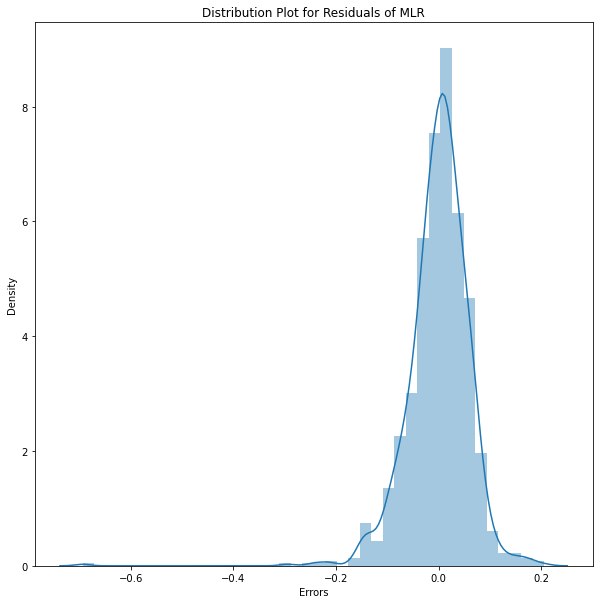

In [60]:
y_train_rfe_pred = np.array(mlr_lm_rfe_3.predict(X_train_rfe_const)).reshape(-1,1)
y_res = y_train_rfe - y_train_rfe_pred
plt.figure(figsize = (10,10))
sns.distplot(y_res, bins = 40)
plt.xlabel("Errors")
plt.title("Distribution Plot for Residuals of MLR")
plt.show()

#### Error Terms Scatter Plot

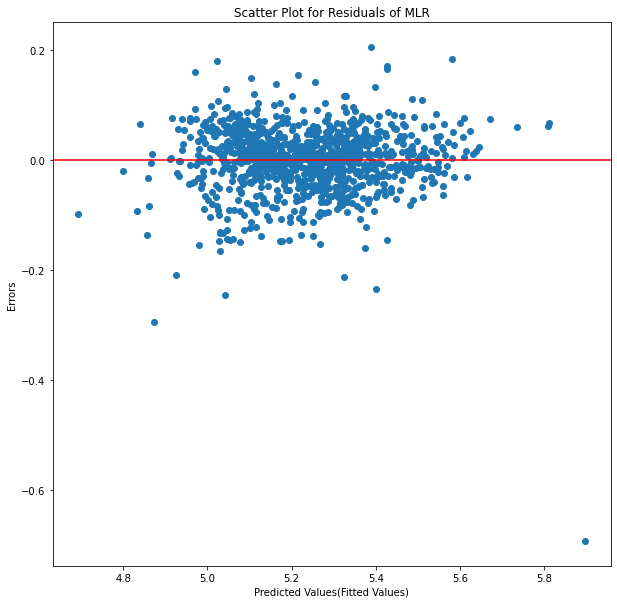

In [61]:
plt.figure(figsize = (10,10))
plt.scatter(x = y_train_rfe_pred, y = y_res)  
plt.axhline(y = 0, color = "r")
plt.xlabel("Predicted Values(Fitted Values)")
plt.ylabel("Errors")
plt.title("Scatter Plot for Residuals of MLR")
plt.show()

<blockquote> Hence we have cross verified the assumptions of Linear Regression i.e the error terms are normally distributed and they are independent from each other as shown by the scatter plot</blockquote>

## ML Model - Ridge Regression

In [62]:
X_train_RR = X_train
X_test_RR = X_test
y_train_RR = y_train
y_test_RR = y_test

In [63]:
#initializing for hyperparameter tuning
params = {"alpha":[0.00001,0.0001,0.001,0.01,0.1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000,10000]}
ridge = Ridge()
folds = KFold(n_splits = 5, shuffle= True, random_state = 51)
model_cv_RR = GridSearchCV(estimator = ridge,param_grid = params, scoring = "r2", cv = folds, return_train_score = True, verbose = 1)
model_cv_RR.fit(X_train_RR,y_train_RR)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=51, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0, 1, 2, 3,
                                   4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70,
                                   80, 90, 100, 200, 300, 400, 500, 600, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [64]:
print(model_cv_RR.best_params_)
alpha_r = list(model_cv_RR.best_params_.values())[0]

{'alpha': 6}


In [65]:
ridge = Ridge(alpha = alpha_r)
ridge.fit(X_train_RR,y_train_RR)

Ridge(alpha=6)

In [66]:
y_train_RR_pred = np.array(ridge.predict(X_train_RR)).reshape(-1,1)
y_test_RR_pred = np.array(ridge.predict(X_test_RR)).reshape(-1,1)

In [67]:
#Train r2 score
print(r2_score(y_true = y_train_RR,y_pred = y_train_RR_pred))

0.8966185626817649


In [68]:
#Test r2 score
print(r2_score(y_true = y_test_RR,y_pred = y_test_RR_pred))

0.8240769814363229


#### Ridge Regression Parameter Tuning

In [69]:
pd.DataFrame(model_cv_RR.cv_results_)[:15]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005966,0.004969,0.002159,0.000803,0.00001,{'alpha': 1e-05},8.816311e-01,0.888359,8.604367e-01,6.808271e-01,...,8.352427e-01,7.789125e-02,18,0.905913,0.905011,0.907105,0.928879,0.909488,0.911279,0.008927
1,0.004642,0.004504,0.001796,0.000978,0.0001,{'alpha': 0.0001},8.816321e-01,0.888367,8.604436e-01,6.808525e-01,...,8.352516e-01,7.788304e-02,17,0.905913,0.905011,0.907105,0.928879,0.909488,0.911279,0.008927
2,0.007671,0.007132,0.001202,0.001472,0.001,{'alpha': 0.001},8.816414e-01,0.888444,8.605100e-01,6.811060e-01,...,8.353389e-01,7.780079e-02,16,0.905912,0.905011,0.907104,0.928879,0.909488,0.911279,0.008927
3,0.003130,0.006259,0.003119,0.006238,0.01,{'alpha': 0.01},8.817322e-01,0.889112,8.609746e-01,6.835744e-01,...,8.361350e-01,7.697653e-02,15,0.905900,0.905007,0.907070,0.928868,0.909473,0.911264,0.008929
4,0.002316,0.002839,0.003127,0.003261,0.1,{'alpha': 0.1},8.825978e-01,0.892533,8.632947e-01,7.024740e-01,...,8.416720e-01,7.038532e-02,13,0.905742,0.904837,0.906815,0.928616,0.909272,0.911056,0.008904
5,0.010676,0.001667,0.002723,0.001416,0,{'alpha': 0},-4.259088e+26,0.890263,-1.117786e+27,-1.075011e+25,...,-3.934114e+26,4.067791e+26,35,0.905064,0.903593,0.905494,0.928826,0.906826,0.909961,0.009489
6,0.003124,0.006249,0.006249,0.007653,1,{'alpha': 1},8.852012e-01,0.898870,8.745821e-01,7.603994e-01,...,8.583705e-01,4.985873e-02,11,0.903741,0.902536,0.904726,0.925382,0.906978,0.908673,0.008481
7,0.000000,0.000000,0.003124,0.006248,2,{'alpha': 2},8.855532e-01,0.899626,8.800471e-01,7.818743e-01,...,8.640845e-01,4.200659e-02,9,0.901535,0.900310,0.902358,0.922281,0.904770,0.906251,0.008147
8,0.006248,0.007652,0.000000,0.000000,3,{'alpha': 3},8.851146e-01,0.899320,8.830608e-01,7.933810e-01,...,8.667153e-01,3.763643e-02,8,0.899471,0.898322,0.900122,0.919553,0.902799,0.904053,0.007888
9,0.006945,0.007032,0.000991,0.001252,4,{'alpha': 4},8.842915e-01,0.898675,8.848495e-01,8.005095e-01,...,8.679978e-01,3.481001e-02,5,0.897535,0.896491,0.898014,0.917094,0.900987,0.902024,0.007682


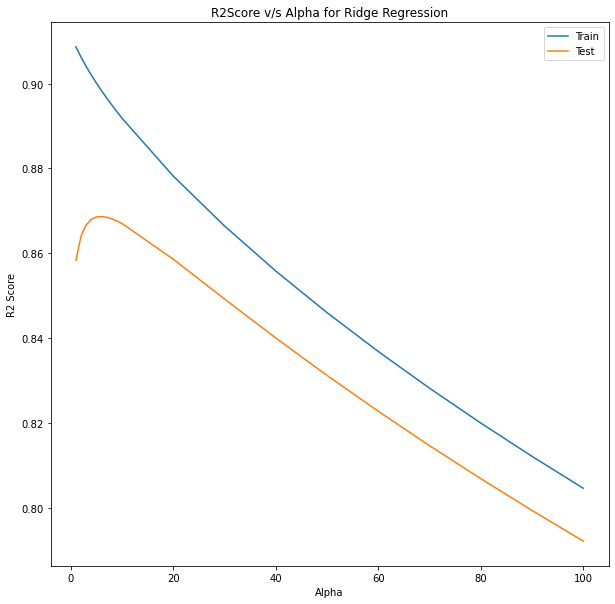

In [70]:
RR_results = pd.DataFrame(model_cv_RR.cv_results_)
plt.figure(figsize = (10,10))
sns.lineplot(RR_results["param_alpha"][6:25],RR_results["mean_train_score"][6:25])
sns.lineplot(RR_results["param_alpha"][6:25],RR_results["mean_test_score"][6:25])
plt.title("R2Score v/s Alpha for Ridge Regression")
plt.xlabel("Alpha")
plt.ylabel("R2 Score")
plt.legend(["Train","Test"])
plt.show()

<blockquote> The highest value of the train score occurs at the best parameter value

#### Ridge Regression Coefficient

In [71]:
l3 = list(ridge.coef_)
l3.insert(0,ridge.intercept_)
l4 = list(X_train.columns)
l4.insert(0,"Constant")
Ridge_Results_Params = pd.DataFrame(list(zip(l4,l3)),columns = ["Attribute","Coefficient"])
Ridge_Results_Params.sort_values(by = "Coefficient",ascending = False).head(20)

,Attribute,Coefficient
0,Constant,4.771154
4,OverallQual,0.147144
16,GrLivArea,0.101185
15,2ndFlrSF,0.094081
21,TotRmsAbvGrd,0.091504
18,FullBath,0.078936
14,1stFlrSF,0.074321
25,GarageCars,0.070219
41,Neighborhood_Crawfor,0.058580
20,KitchenQual,0.055148


#### Model Evaluation

In [72]:
#Test r2 Score
print(r2_score(y_true = y_test_RR,y_pred = y_test_RR_pred))
#rmse score on Test Data
print(np.sqrt(mean_squared_error(y_test_RR,y_test_RR_pred)))

0.8240769814363229
0.07409020748245766


In [73]:
Model_Data.loc[2] = ["Ridge Regression",r2_score(y_true = y_train_RR,y_pred = y_train_RR_pred),r2_score(y_true = y_test_RR,y_pred = y_test_RR_pred),np.sqrt(mean_squared_error(y_test_RR,y_test_RR_pred)),alpha_r]
Model_Data

,Model,Train_R2,Test_R2,Test RMSE,Alpha Value
1,Multiple Linear Regression (RFE),0.876950,0.806118,0.07778,0
2,Ridge Regression,0.896619,0.824077,0.07409,6


#### Residual Analysis

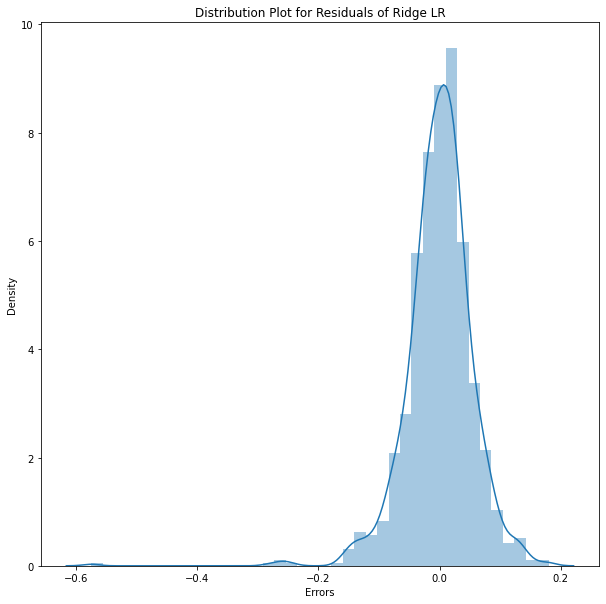

In [74]:
y_res_RR = np.array(y_train_RR).reshape(-1,1) - y_train_RR_pred
plt.figure(figsize = (10,10))
sns.distplot(y_res_RR, bins = 40)
plt.xlabel("Errors")
plt.title("Distribution Plot for Residuals of Ridge LR")
plt.show()

#### Error term Scatter Plot

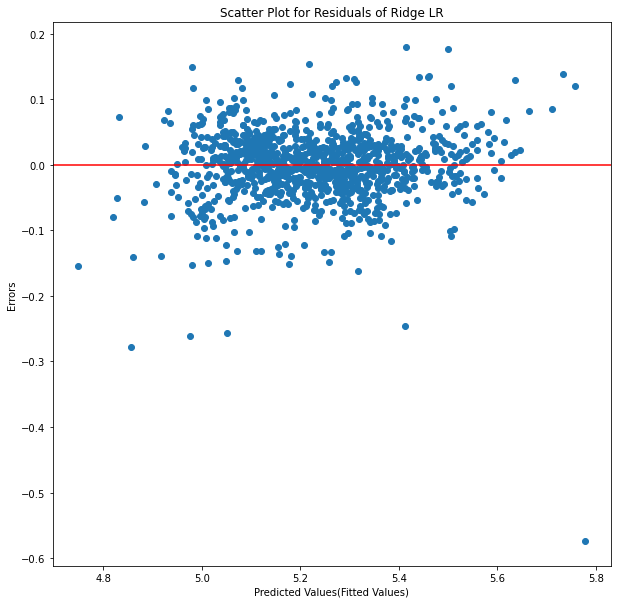

In [75]:
plt.figure(figsize = (10,10))
plt.scatter(x = y_train_RR_pred, y = y_res_RR)  
plt.axhline(y = 0, color = "r")
plt.xlabel("Predicted Values(Fitted Values)")
plt.ylabel("Errors")
plt.title("Scatter Plot for Residuals of Ridge LR")
plt.show()

## ML Model - Lasso Regression

In [76]:
X_train_Las = X_train
X_test_Las = X_test
y_train_Las = y_train
y_test_Las = y_test

In [77]:
#initializing for hyperparameter tuning
params = {"alpha":[0.00001,0.0001,0.001,0.01,0.1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000,10000]}
lasso = Lasso()
folds = KFold(n_splits = 5, shuffle= True, random_state = 51)
model_cv_Las = GridSearchCV(estimator = lasso,param_grid = params, scoring = "r2", cv = folds, return_train_score = True, verbose = 1)
model_cv_Las.fit(X_train_Las,y_train_Las)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=51, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0, 1, 2, 3,
                                   4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70,
                                   80, 90, 100, 200, 300, 400, 500, 600, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [78]:
print(model_cv_Las.best_params_)
alpha_l = list(model_cv_Las.best_params_.values())[0]

{'alpha': 0.001}


In [79]:
lasso = Lasso(alpha = alpha_l)
lasso.fit(X_train_Las,y_train_Las)

Lasso(alpha=0.001)

In [80]:
y_train_Las_pred = np.array(lasso.predict(X_train_Las)).reshape(-1,1)
y_test_Las_pred = np.array(lasso.predict(X_test_Las)).reshape(-1,1)

In [81]:
#Train r2 score
print(r2_score(y_true = y_train_Las,y_pred = y_train_Las_pred))

0.8794615638469815


#### Lasso Regression Parameter Tuning

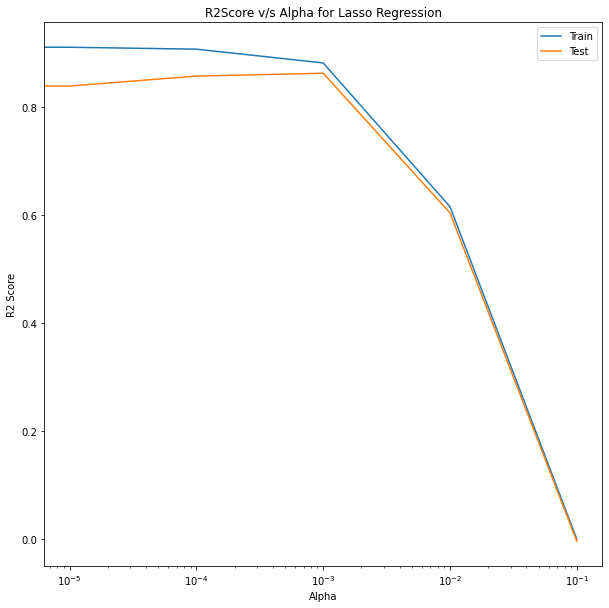

In [82]:
Las_results = pd.DataFrame(model_cv_Las.cv_results_)
plt.figure(figsize = (10,10))
sns.lineplot(Las_results["param_alpha"][:6],Las_results["mean_train_score"][:6])
sns.lineplot(Las_results["param_alpha"][:6],Las_results["mean_test_score"][:6])
plt.title("R2Score v/s Alpha for Lasso Regression")
plt.xlabel("Alpha")
plt.ylabel("R2 Score")
plt.xscale("log")
plt.legend(["Train","Test"])
plt.show()

#### Lasso Coefficients

In [83]:
l1 = list(lasso.coef_)
l1.insert(0,lasso.intercept_)
l2 = list(X_train.columns)
l2.insert(0,"Constant")
Las_Results_Params = pd.DataFrame(list(zip(l2,l1)),columns = ["Attribute","Coefficient"])
Las_Results_Params = Las_Results_Params[(Las_Results_Params["Coefficient"]!=0)]
Las_Results_Params.sort_values(by = "Coefficient",ascending = False)

,Attribute,Coefficient
0,Constant,4.776617
16,GrLivArea,0.362941
4,OverallQual,0.254729
25,GarageCars,0.113513
20,KitchenQual,0.060822
7,BsmtQual,0.048986
18,FullBath,0.048674
23,FireplaceQu,0.045572
21,TotRmsAbvGrd,0.042423
8,BsmtExposure,0.039176


#### Model Evaluation

In [84]:
#Test r2 Score
print(r2_score(y_true = y_test_Las,y_pred = y_test_Las_pred))
#rmse score on Test Data
print(np.sqrt(mean_squared_error(y_test_Las,y_test_Las_pred)))

0.8125421591597934
0.07648059924733124


In [85]:
Model_Data.loc[3] = ["Lasso Regression",r2_score(y_true = y_train_Las,y_pred = y_train_Las_pred),r2_score(y_true = y_test_Las,y_pred = y_test_Las_pred),np.sqrt(mean_squared_error(y_test_Las,y_test_Las_pred)),alpha_l]
Model_Data

,Model,Train_R2,Test_R2,Test RMSE,Alpha Value
1,Multiple Linear Regression (RFE),0.876950,0.806118,0.077780,0
2,Ridge Regression,0.896619,0.824077,0.074090,6
3,Lasso Regression,0.879462,0.812542,0.076481,0.001


#### Residual Analysis

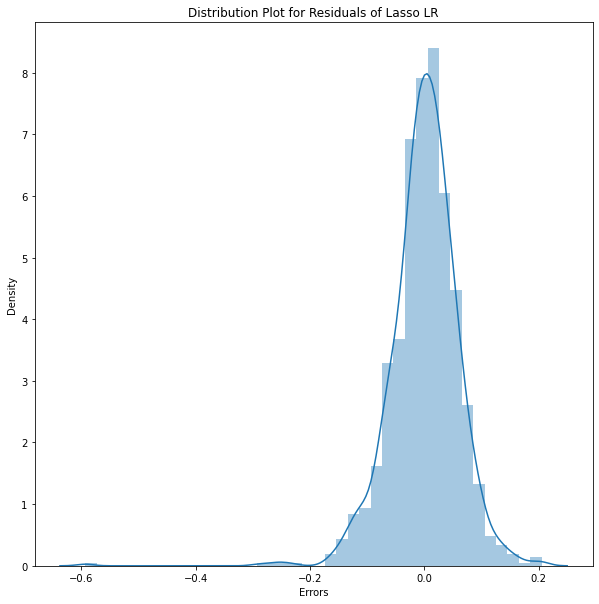

In [86]:
y_res_Las = np.array(y_train_Las).reshape(-1,1) - y_train_Las_pred
plt.figure(figsize = (10,10))
sns.distplot(y_res_Las, bins = 40)
plt.xlabel("Errors")
plt.title("Distribution Plot for Residuals of Lasso LR")
plt.show()

#### Error Terms Scatter Plot

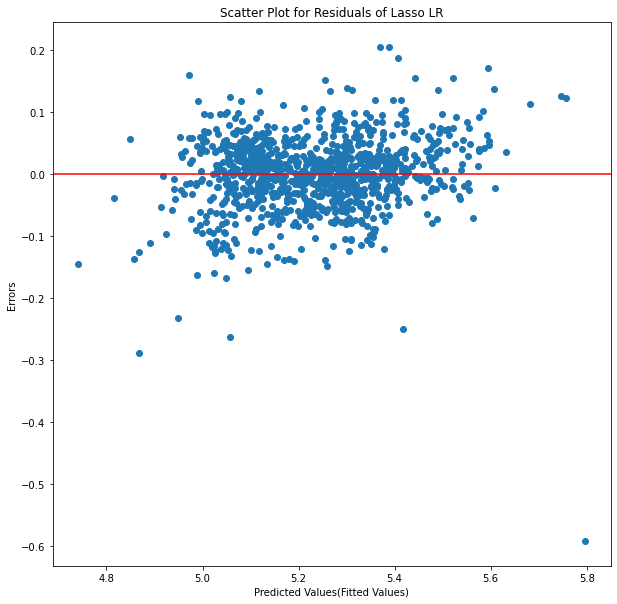

In [87]:
plt.figure(figsize = (10,10))
plt.scatter(x = y_train_Las_pred, y = y_res_Las)  
plt.axhline(y = 0, color = "r")
plt.xlabel("Predicted Values(Fitted Values)")
plt.ylabel("Errors")
plt.title("Scatter Plot for Residuals of Lasso LR")
plt.show()

# Summary

In [88]:
Model_Data

,Model,Train_R2,Test_R2,Test RMSE,Alpha Value
1,Multiple Linear Regression (RFE),0.876950,0.806118,0.077780,0
2,Ridge Regression,0.896619,0.824077,0.074090,6
3,Lasso Regression,0.879462,0.812542,0.076481,0.001


<blockquote> Three different types of linear regression was attempted over the data set and it is proposed to move forward with the Lasso Model.</blockquote>

<blockquote> Based on the Lasso Model - Top 5 price drivers are as follows:
    
    1. GrLivArea - Above Grade Living Area - In Layman's term the larger the square feet of the house better chance of making the price
   
    2. OverallQual - Overall Quality - This variable can help convey the story on a conceptual level - It could possibly capture intricate design features on a high level
    
    3. GarageCars - The number of car space could be a direct correlation to the luxury factor of these houses
    
    4. KitchenQual - Kitchen is an integral part of any home - Hence Kitchen Quality shall capture this
    
    5. BsmTQual - Another Qualitative factor that is a significant contributor to the price - Larger Basement space is always an added addition to the housing market. 

    </blockqoute>

# Exercise Questions

### Question_1

In [89]:
ridge_t = Ridge(alpha = alpha_r*2)
ridge_t.fit(X_train_RR,y_train_RR)
y_train_RR_pred_t = np.array(ridge_t.predict(X_train_RR)).reshape(-1,1)
y_test_RR_pred_t = np.array(ridge_t.predict(X_test_RR)).reshape(-1,1)
print(r2_score(y_true = y_train_RR,y_pred = y_train_RR_pred_t))
print(r2_score(y_true = y_test_RR,y_pred = y_test_RR_pred_t))

0.8892654669091
0.8192419827694811


In [90]:
l5 = list(ridge_t.coef_)
l5.insert(0,ridge_t.intercept_)
l6 = list(X_train.columns)
l6.insert(0,"Constant")
Ridge_Results_Params = pd.DataFrame(list(zip(l6,l5)),columns = ["Attribute","Coefficient"])
Ridge_Results_Params.sort_values(by = "Coefficient",ascending = False).head(20)

,Attribute,Coefficient
0,Constant,4.813378
4,OverallQual,0.114668
16,GrLivArea,0.083093
21,TotRmsAbvGrd,0.082189
15,2ndFlrSF,0.078620
18,FullBath,0.074730
25,GarageCars,0.066711
14,1stFlrSF,0.061158
20,KitchenQual,0.056938
26,GarageArea,0.050680


In [91]:
lasso_t = Lasso(alpha = alpha_l*2)
lasso_t.fit(X_train_Las,y_train_Las)
y_train_Las_pred_t = np.array(lasso_t.predict(X_train_Las)).reshape(-1,1)
y_test_Las_pred_t = np.array(lasso_t.predict(X_test_Las)).reshape(-1,1)
print(r2_score(y_true = y_train_Las,y_pred = y_train_Las_pred_t))
print(r2_score(y_true = y_test_Las,y_pred = y_test_Las_pred_t))

0.8569480873160261
0.7958042191619585


In [92]:
l7 = list(lasso_t.coef_)
l7.insert(0,lasso_t.intercept_)
l8 = list(X_train.columns)
l8.insert(0,"Constant")
Lasso_Results_Params = pd.DataFrame(list(zip(l8,l7)),columns = ["Attribute","Coefficient"])
Lasso_Results_Params.sort_values(by = "Coefficient",ascending = False).head(20)

,Attribute,Coefficient
0,Constant,4.813707
16,GrLivArea,0.262089
4,OverallQual,0.254755
25,GarageCars,0.135821
20,KitchenQual,0.069330
23,FireplaceQu,0.059755
18,FullBath,0.044771
9,BsmtFinType1,0.038815
21,TotRmsAbvGrd,0.037220
8,BsmtExposure,0.032322


### Question_3

In [93]:
X_train_Las_t = X_train.drop(["GrLivArea","OverallQual","GarageCars","KitchenQual","BsmtQual"],axis = 1)
X_test_Las_t = X_test.drop(["GrLivArea","OverallQual","GarageCars","KitchenQual","BsmtQual"],axis = 1)
y_train_Las_t = y_train
y_test_Las_t = y_test

In [94]:
#initializing for hyperparameter tuning
params = {"alpha":[0.00001,0.0001,0.001,0.01,0.1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000,10000]}
lasso_t3 = Lasso()
folds = KFold(n_splits = 5, shuffle= True, random_state = 51)
model_cv_Las_t3 = GridSearchCV(estimator = lasso_t3,param_grid = params, scoring = "r2", cv = folds, return_train_score = True, verbose = 1)
model_cv_Las_t3.fit(X_train_Las_t,y_train_Las_t)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=51, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0, 1, 2, 3,
                                   4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70,
                                   80, 90, 100, 200, 300, 400, 500, 600, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [95]:
print(model_cv_Las_t3.best_params_)
alpha_l_t3 = list(model_cv_Las_t3.best_params_.values())[0]

{'alpha': 0.001}


In [96]:
lasso_t3 = Lasso(alpha = alpha_l_t3)
lasso_t3.fit(X_train_Las_t,y_train_Las_t)

Lasso(alpha=0.001)

In [97]:
y_train_Las_pred_t3 = np.array(lasso_t3.predict(X_train_Las_t)).reshape(-1,1)
y_test_Las_pred_t3 = np.array(lasso_t3.predict(X_test_Las_t)).reshape(-1,1)

In [98]:
print(r2_score(y_true = y_train_Las_t,y_pred = y_train_Las_pred_t3))
print(r2_score(y_true = y_test_Las_t,y_pred = y_test_Las_pred_t3))

0.853758919705093
0.7858321850087473


In [99]:
l9 = list(lasso_t3.coef_)
l9.insert(0,lasso_t3.intercept_)
l10 = list(X_train_Las_t.columns)
l10.insert(0,"Constant")
Lasso_Results_Params = pd.DataFrame(list(zip(l10,l9)),columns = ["Attribute","Coefficient"])
Lasso_Results_Params = Lasso_Results_Params[(Lasso_Results_Params["Coefficient"]!=0)]
Lasso_Results_Params.sort_values(by = "Coefficient",ascending = False).head(20)

,Attribute,Coefficient
0,Constant,4.901028
12,1stFlrSF,0.254359
21,GarageArea,0.135197
13,2ndFlrSF,0.110872
17,TotRmsAbvGrd,0.096233
5,ExterQual,0.094270
15,FullBath,0.093510
19,FireplaceQu,0.066601
6,BsmtExposure,0.063445
7,BsmtFinType1,0.048789


In [100]:
Lasso_Results_Params.shape

(34, 2)